In [2]:
from IPython.display import display, HTML
display(HTML ("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}""
div.output {font-size:12pt; font-weight:bold;}
div.input{font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

**<font size='6' color='red'>ch9_시계열 데이터 분석 및 예측</font>**
- pip install statsmodels==0.13.5 # 주기적인 데이터의 트렌드 추이
- pip install prophet # facebook에서 개발한 시계열 예측 lib

In [3]:
%pip install statsmodels==0.13.5

   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ----------- ---------------------------- 2.6/9.1 MB 21.6 MB/s eta 0:00:01
   ---------------------------------------- 9.1/9.1 MB 33.4 MB/s  0:00:00

   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- -----------

In [4]:
%pip install prophet

   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ----------------------------------- ---- 10.7/12.1 MB 55.8 MB/s eta 0:00:01
   ---------------------------------------- 12.1/12.1 MB 39.9 MB/s  0:00:00
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 1.3/1.3 MB 34.3 MB/s  0:00:00

   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------- 2/5 [holidays]
   -------------------------------- ------- 4/5 [prophet]
   -------------------------------- ------- 4/5 [prophet]
   -------------------------------- -------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
# 한글설정
plt.rc('font', family='Malgun Gothic') # 원도우즈에서 시각화시 한글 깨짐 방지
plt.rc('axes', unicode_minus=False) # 축의 '-' 깨짐 방지

In [6]:
# AirKoread 사이트에 다운로드
df = pd.read_csv('data/일별평균대기오염도_2022(에어코리아).csv', encoding='cp949')
df.tail()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
18245,20221231,구로구,0.037,0.009,0.5,0.004,43.0,29.0
18246,20221231,광진구,0.026,0.005,0.8,0.003,44.0,34.0
18247,20221231,관악산,0.008,0.038,0.3,0.005,29.0,18.0
18248,20221231,관악구,0.045,0.009,0.7,0.003,42.0,28.0
18249,20221231,공항대로,0.042,0.007,0.7,0.004,41.0,31.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18250 entries, 0 to 18249
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          18250 non-null  int64  
 1   측정소명          18250 non-null  object 
 2   이산화질소농도(ppm)  18172 non-null  float64
 3   오존농도(ppm)     18176 non-null  float64
 4   일산화탄소농도(ppm)  18174 non-null  float64
 5   아황산가스농도(ppm)  18176 non-null  float64
 6   미세먼지농도(㎍/㎥)   18115 non-null  float64
 7   초미세먼지농도(㎍/㎥)  18122 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.1+ MB


In [8]:
# 결측치가 한 열이라도 있는 행의 측정소명
df.loc[df.isna().any(axis=1), '측정소명'].unique()

array(['남산', '세곡', '관악산', '마포아트센터', '서대문구', '도산대로', '북한산', '항동', '동작구',
       '서초구', '동작대로', '행주', '올림픽공원', '동대문구', '송파구', '은평구', '한강대로', '강변북로',
       '시흥대로', '성북구', '관악구'], dtype=object)

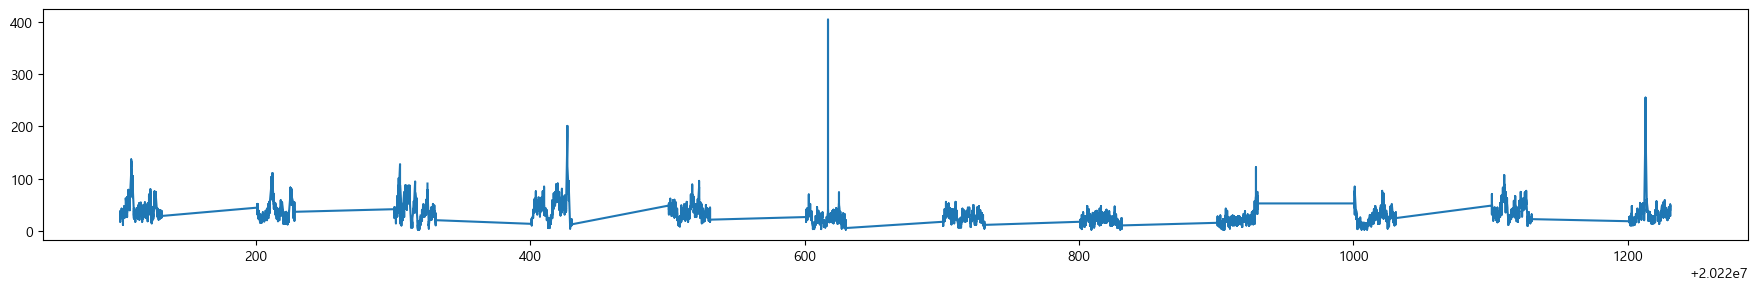

In [9]:
plt.figure(figsize=(22,3))
plt.plot(df['측정일시'], df['미세먼지농도(㎍/㎥)'])

In [10]:
# 측정일시 컬럼을 날짜형으로 변환
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18250 entries, 0 to 18249
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          18250 non-null  int64  
 1   측정소명          18250 non-null  object 
 2   이산화질소농도(ppm)  18172 non-null  float64
 3   오존농도(ppm)     18176 non-null  float64
 4   일산화탄소농도(ppm)  18174 non-null  float64
 5   아황산가스농도(ppm)  18176 non-null  float64
 6   미세먼지농도(㎍/㎥)   18115 non-null  float64
 7   초미세먼지농도(㎍/㎥)  18122 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.1+ MB


In [11]:
df['측정일'] = df['측정일시'].astype(str)
df.dtypes

측정일시              int64
측정소명             object
이산화질소농도(ppm)    float64
오존농도(ppm)       float64
일산화탄소농도(ppm)    float64
아황산가스농도(ppm)    float64
미세먼지농도(㎍/㎥)     float64
초미세먼지농도(㎍/㎥)    float64
측정일              object
dtype: object

In [12]:

df.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥),측정일
0,20220101,강남구,0.029,0.014,0.5,0.003,25.0,12.0,20220101
1,20220101,홍릉로,0.038,0.009,0.6,0.004,27.0,16.0,20220101
2,20220101,행주,0.034,0.012,0.7,0.004,27.0,16.0,20220101
3,20220101,항동,0.030,0.011,0.5,0.003,27.0,14.0,20220101
4,20220101,한강대로,0.037,0.011,0.6,0.003,34.0,14.0,20220101


In [13]:
df['측정일'] = df['측정일'].str[:4] + '-' + df['측정일'].str[4:6] + '-' + df['측정일'].str[6:]

In [14]:
df[['측정일시', '측정일']].sample()

,측정일시,측정일
14546,20221018,2022-10-18


In [15]:
#df['측정일'].astype('datetime64[ns]')
df['측정일'] = pd.to_datetime(df['측정일'])

In [16]:

df.dtypes

측정일시                     int64
측정소명                    object
이산화질소농도(ppm)           float64
오존농도(ppm)              float64
일산화탄소농도(ppm)           float64
아황산가스농도(ppm)           float64
미세먼지농도(㎍/㎥)            float64
초미세먼지농도(㎍/㎥)           float64
측정일             datetime64[ns]
dtype: object

In [17]:
# df의 열순서를 변경
cols = df.columns.tolist()
cols = [cols[0], cols[-1]] + cols[1:-1]
df = df[cols]
df.head(1)

,측정일시,측정일,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
0,20220101,2022-01-01,강남구,0.029,0.014,0.5,0.003,25.0,12.0


In [18]:

df = df.drop('측정일시', axis=1)#.copy()

In [19]:
df.columns = ['측정일','측정소명','이산화질소농도', '오존농도', '일산화탄소농도',
             '아황산가스농도','미세먼지농도', '초미세먼지농도']
df.sample()

,측정일,측정소명,이산화질소농도,오존농도,일산화탄소농도,아황산가스농도,미세먼지농도,초미세먼지농도
7017,2022-05-21,영등포로,0.024,0.033,0.4,0.003,36.0,19.0


In [20]:
# 결측치가 없는 측정소명만 추출
df_flt = df[df['측정소명']=='공항대로']

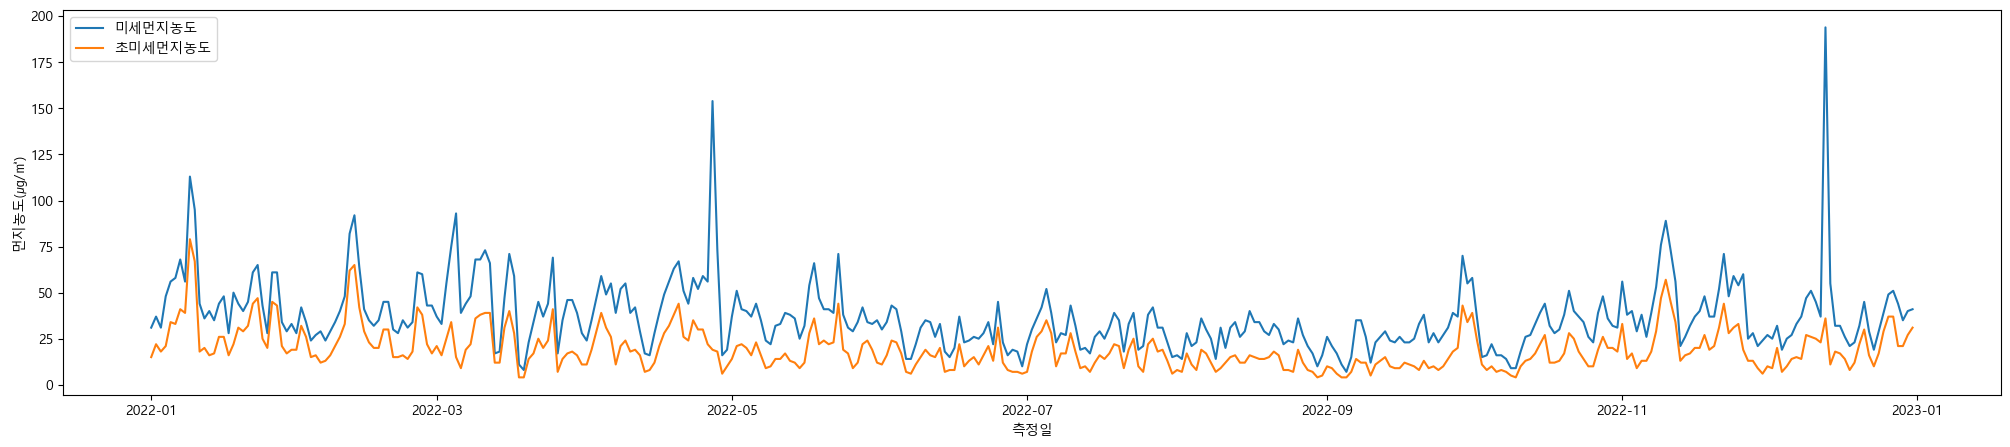

In [21]:
# 미세먼지농도, 초미세먼지농도 시계열 데이터 시각화
plt.figure(figsize=(25,5))
plt.plot(df_flt['측정일'], df_flt['미세먼지농도'], label='미세먼지농도')
plt.plot(df_flt['측정일'], df_flt['초미세먼지농도'], label='초미세먼지농도')
plt.xlabel('측정일')
plt.ylabel('먼지농도(㎍/㎥)')
plt.legend(loc='upper left')
plt.show()


# statsmodels
- 결측치가 없는 데이터에서 주기적인 데이터의 트렌드 추이.
- 날짜형 인덱스와 데이터 컬럼

In [22]:

df_flt2 = df_flt[['측정일','미세먼지농도']]
ts = df_flt2.set_index('측정일')
ts.head(3)

,미세먼지농도
측정일,
2022-01-01,31.0
2022-01-02,37.0
2022-01-03,31.0


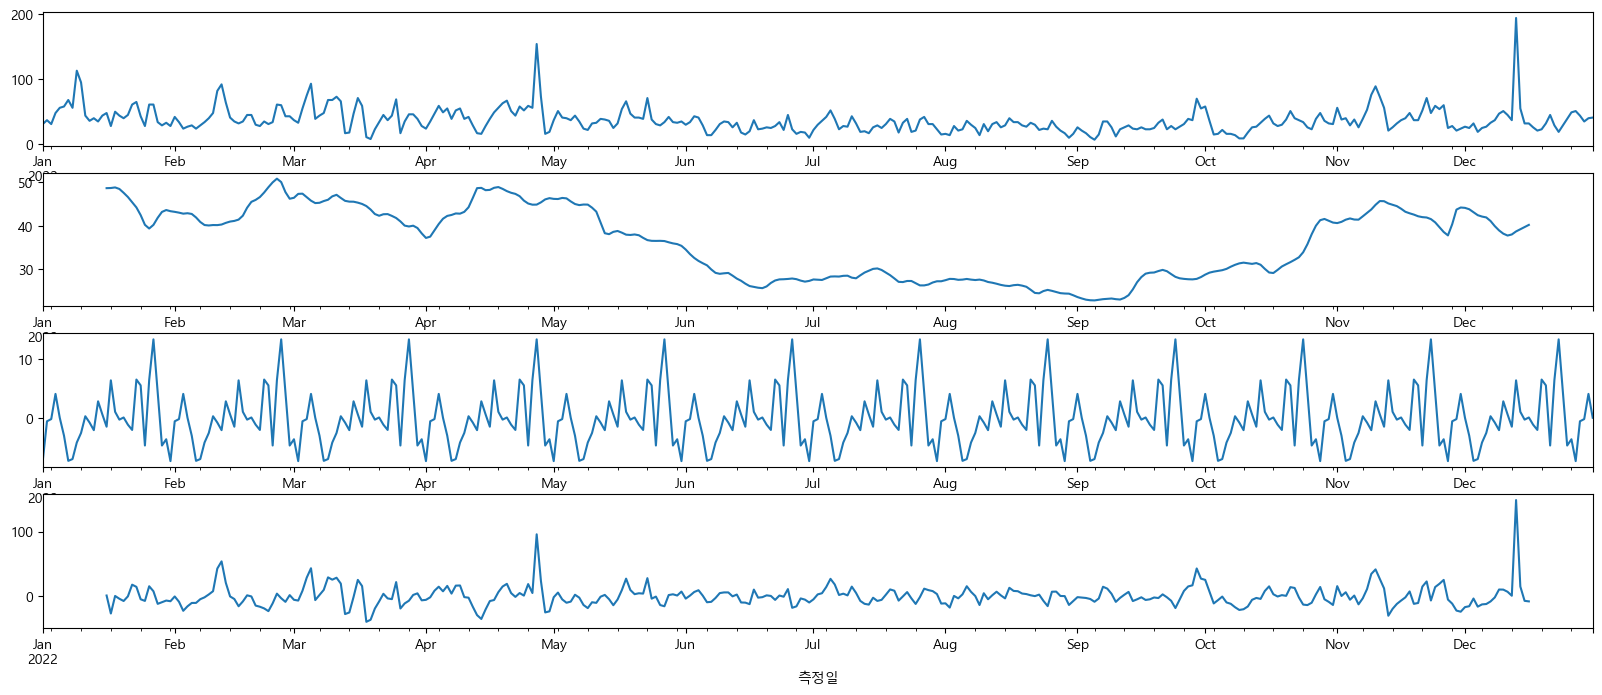

In [23]:
# 시계열 데이터의 구조를 분해하는 도구 : 실제값 추세, 계절성, 잔차를 분석
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts['미세먼지농도'],
                           period=30) # 30일 단위로 계절성을 분석해 봐
# result.observed : 실제 데이터
# result.trend # 데이터의 장기적인 변화, 전반적으로 감소, 증가
# result.seasonal # 주기적인 계절성 패텅
# result.resid # 잔차(실제값에서 추세와 계정성을 뺀 노이즈)
fig, axes = plt.subplots(4, 1, figsize=(20, 8))
# axes[0].plot(result.observed)
result.observed.plot(ax=axes[0])
result.trend.plot(ax=axes[1])
result.seasonal.plot(ax=axes[2])
result.resid.plot(ax=axes[3])
plt.show()

In [24]:
result

# Prophet
- 계절성, 추세, 휴일 효과 등을 자동으로 모델, 예측
- ds(시간), y(숫자) 컬럼

In [25]:

df_flt2.columns = ['ds', 'y'] # fit시 컬럼명 ds, y를 읽음
df_flt2.head(1)

,ds,y
44,2022-01-01,31.0


In [26]:
from prophet import Prophet
# 1. 모델 생성
p_model = Prophet()
# 2. 학습
p_model.fit(df_flt2)

Importing plotly failed. Interactive plots will not work.
09:06:14 - cmdstanpy - INFO - Chain [1] start processing
09:06:14 - cmdstanpy - INFO - Chain [1] done processing


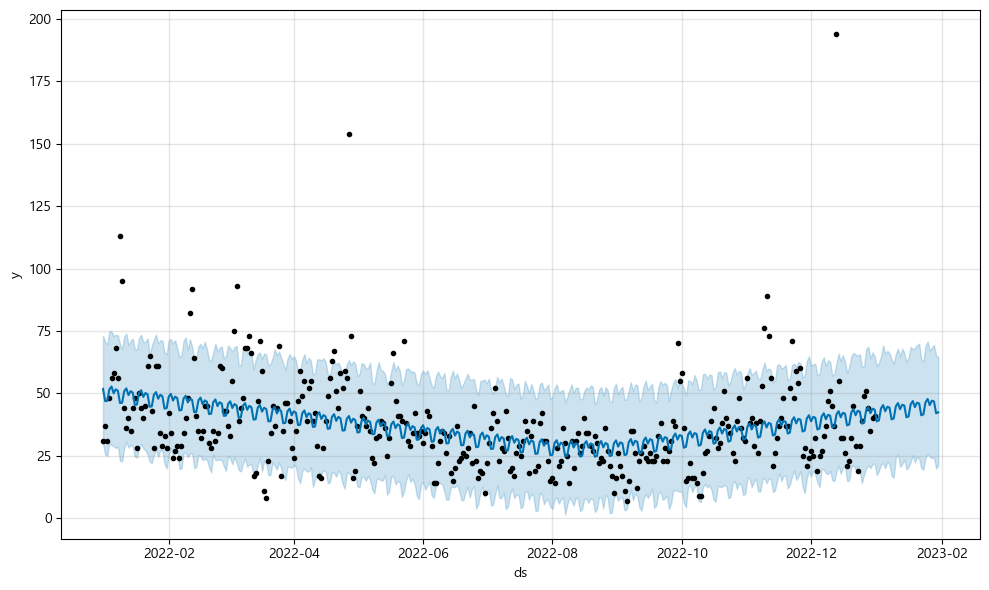

In [27]:

# 3. 30일이후의 데이터를 예측하는 미래 df을 생성
future = p_model.make_future_dataframe(periods=30)
# 4. 예측 수행
forecast = p_model.predict(future)
# forecast.tail(30)
# 5. 시각화
p = p_model.plot(forecast)

In [28]:

forecast[['ds','yhat','yhat_lower', 'yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
365,2023-01-01,38.738264,17.241938,60.930548
366,2023-01-02,39.108784,18.835518,62.157896
367,2023-01-03,43.966999,21.474030,64.723819
368,2023-01-04,45.272272,21.853024,69.236304
369,2023-01-05,42.812966,19.941042,65.866769
370,2023-01-06,44.613397,22.549603,67.014617
371,2023-01-07,44.275891,21.455105,66.116416
372,2023-01-08,39.550926,16.891956,63.627850
373,2023-01-09,39.921445,16.214238,61.794430
374,2023-01-10,44.779660,24.345356,65.955575


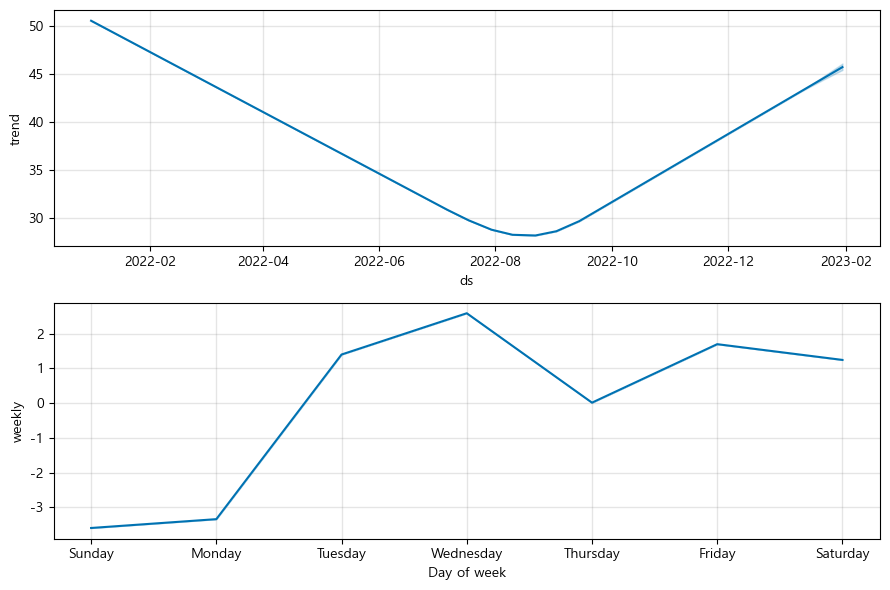

In [29]:

# 트랜드와 휴일 효과
p = p_model.plot_components(forecast)

In [30]:

# 2023-01-12
forecast.loc[forecast['ds']=='2023-01-06', ['ds', 'yhat']]

,ds,yhat
370,2023-01-06,44.613397
